TP1: Introduction aux opérateurs de base de PyTorch (Décomposition d'une image à l'aide d'ondelette de Haar et autres traitement)
============

Introduction au sujet
------

L'objectif de ce sujet est d'étudier des opérateurs de base de Pytorch au travers de la décomposition par ondelette de Haar d'une image. La décomposition d'une image en ondelette est notamment utilisé en compression dans des formats de fichier tel que JPEG2000. Nous travaillerons sur une photographie d'[Ada Lovelace](https://fr.wikipedia.org/wiki/Ada_Lovelace) qui vous est fournis. 

Le code est à écrire en python3 à la suite des questions dans ce fichier. Vous appuierez soit sur le bouton *run cell*, soit sur les touches *Ctrl-Entrée*, à l’intérieur de la zone de saisie, pour lancer l'exécution de vos commandes. Si la commande est en cours d’exécution une étoile apparaît à côté de la zone de saisie de la commande : In [\*]. Une fois le calcul achevé, l'étoile est remplacée par le numéro du run permettant de retrouver par la suite dans quel ordre ont été lancés chaque bloc.

N'hésitez pas à regarder régulièrement la documentation de ces librairies, des exemples d'utilisation accompagnent généralement l'explication de chaque fonction.

Langage utilisé:
- Python 3: https://docs.python.org/3/

Librairie de math:
- Numpy: https://docs.scipy.org/doc/numpy/reference/
- Scipy: https://docs.scipy.org/doc/scipy/reference/

Librairie d'affichage de données:
- Matplotilb: https://matplotlib.org/contents.html

Librairie Pytorch:
- PyTorch: https: https://pytorch.org/docs/stable/

Commencez par importer les librairies nécessaires au TP.

In [1]:
# Import Torch
import torch
import torch.nn as nn

# Import numpy et matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/tp_deep_learning/lib/python3.8/site-packages/numpy/lib/scimath.py:46: RuntimeWarning: divide by zero encountered in log
  _ln2 = nx.log(2.0)


0 - Introduction au notebook jupyter
----------

Exécutez la ligne suivante en vous plaçant dans la cellule et en appuyant sur *Ctrl+Entrée*.

In [2]:
a=1
print(a)

1


Lancez la ligne suivante plusieurs fois. 

In [3]:
a += 1
print(a)

2


Relancez le premier bloc définissant la variable `a` puis lancez le bloc suivant (remarquez bien les valeurs après In [\*] ):

In [4]:
print(a)

2


Vous pouvez utiliser l'aide à la complétion avec tab. Testez avec la fonction numpy.random.randn.

In [5]:
random = np.random.randn()
print(random)

-0.7377907350041703


Vous pouvez accéder à la documentation de la fonction avec *Shit+tab*. Pour plus d'information, cliquez sur le +. Testez avec la fonction numpy.random.randn.

Testez le code suivant et comprenez-le :

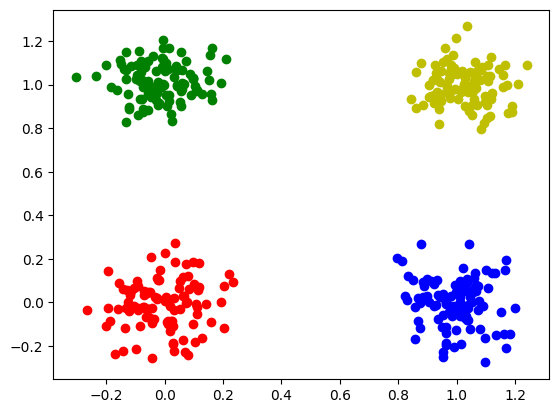

In [6]:
X = 0.1*np.random.randn(100,4,2)+np.array([[0,0],[0,1],[1,0],[1,1]])
for i in range(4):
    plt.scatter(X[:,i,0],X[:,i,1],c='rgby'[i])

plt.show()

1 - Visualisation des données (Matplotlib)<a id="title1.3"></a> 
-----

`Matplotlib` permet de construire une figure à visualiser. La création d'une figure ce fait à l'aide de l'instruction `plt.figure`. Toutes les instructions que l'on fait ensuite agissent sur la figure courante en mémoire mais ne sont pas directement visibles. Afin de rendre effectivement visible la figure finale, on utilise l'instruction `plt.show`. Cette instruction est bloquante en python standard. 
Testez le code suivant affichant un `sinus` et un `cosinus`.

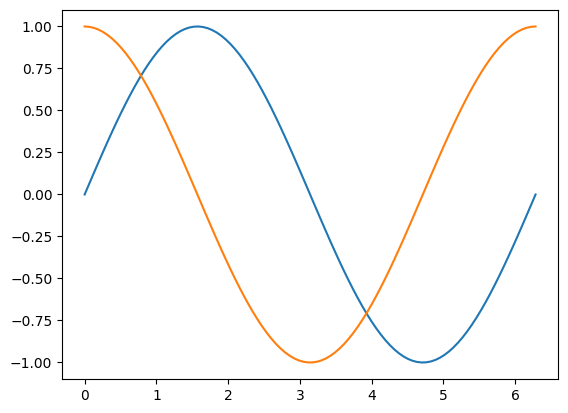

In [7]:
x = torch.linspace(0,2*np.pi,100) # création de 100 points entre 0 et 2pi
plt.figure() # Création d'une figure
plt.plot(x,torch.sin(x)) # Ajout du tracé d'un sinus composé de 100 points reliés par des droites entre 0 et 2pi
plt.plot(x,torch.cos(x)) # Ajout du tracé d'un cosinus composé de 100 points reliés par des droites entre 0 et 2pi
plt.show() # Affichage de la figure créée.

Regardez le code suivant. Il permet de tracer la fonction sinus en rouge en mettant des carrés (square == s) aux points vraiment calculés et en les reliant par une droite. Le deuxième tracé est la fonction sinus en bleu, seul les points sous la forme d'étoile sont tracés.

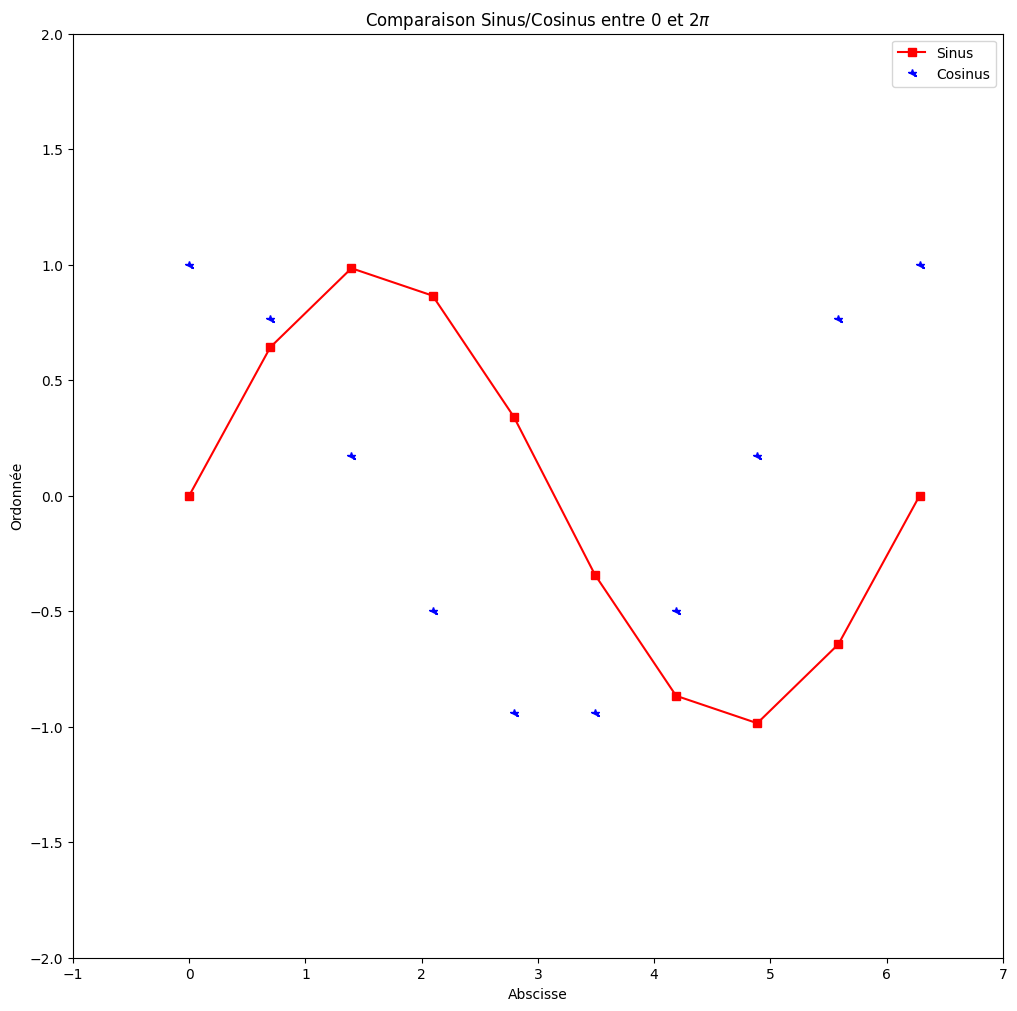

In [8]:
x = torch.linspace(0,2*np.pi,10)

plt.figure(figsize=(12,12)) # définition d'une figure en précisant sa taille

# Courbes
plt.plot(x,torch.sin(x),'rs-',label='Sinus')
plt.plot(x,torch.cos(x),'b*',label='Cosinus')

# Titre et légende
plt.title('Comparaison Sinus/Cosinus entre 0 et $2\pi$')
plt.legend()

# Texte des axes
plt.xlabel('Abscisse')
plt.ylabel('Ordonnée')

# Définition des limites des axes
plt.xlim([-1,7])
plt.ylim([-2,2])

plt.show() # Affichage de la figure créée.

Attention l'ordre des points est important si on souhaite les reliés:

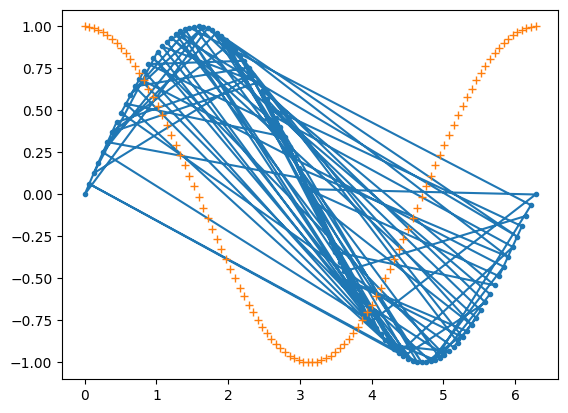

In [9]:
x = np.linspace(0,2*np.pi,100)
np.random.shuffle(x)
plt.figure()
plt.plot(x,np.sin(x),'.-')
plt.plot(x,np.cos(x),'+')
plt.show()

Faites une figure affichant à la fois la fonction sinus cardinal de $x$ ($sinc(x)=\dfrac{sin(x)}{x}$) et l'inverse de x. Vous mettrez la fonction inverse en pointillé. Vous ajouterez également un titre et une légende.

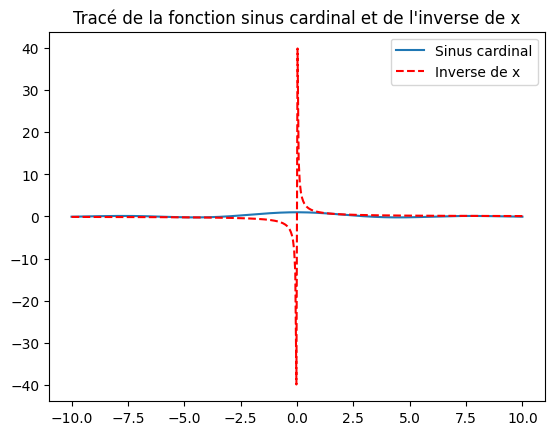

In [10]:
# Définition de la plage de valeurs pour x
x = np.linspace(-10, 10, 400)

# Calcul des valeurs des fonctions
sin_c = np.sinc(x/np.pi)
inverse_x = 1/x

# Création de la figure
plt.figure()

# Tracé de la fonction sinus cardinal
plt.plot(x, sin_c, label='Sinus cardinal')

# Tracé de l'inverse de x en pointillé
plt.plot(x, inverse_x, 'r--', label='Inverse de x')

# Titre de la figure
plt.title("Tracé de la fonction sinus cardinal et de l'inverse de x")

# Légende
plt.legend()

# Affichage de la figure
plt.show()

La fonction `plt.scatter` permet d'afficher spécifiquement des points qui ne seront pas reliés. Elle permet notamment d'afficher des points de couleurs et tailles différentes.

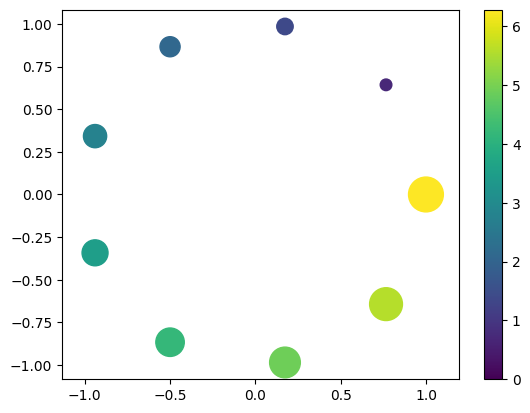

In [11]:
t = np.linspace(0,2*np.pi,10)
plt.figure()
plt.scatter(np.cos(t),np.sin(t),c=t,s=100*t)
plt.axis('equal') # pour avoir des axes avec les mêmes proportions.
plt.colorbar() # Échelle des valeurs associées aux couleurs 

#cbar = plt.colorbar(ticks=[0,np.pi,2*np.pi])
#cbar.ax.set_yticklabels(["Low","Medium","High"])

plt.show()

La fonction `plt.imshow` permet d'afficher un tableau comme une image. Les valeurs doivent être soit entières entre 0 et 255 soit flottantes entre 0. et 1. .

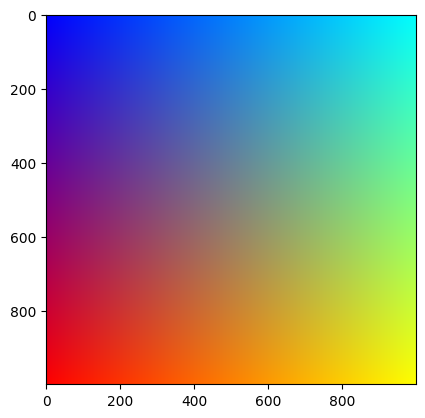

In [12]:
n=int(1e3)
x = np.linspace(0,1,n)
degradee = np.tile(x[:,np.newaxis],n)
im = np.stack((degradee,degradee.T,1-degradee),axis=2)

plt.figure()
plt.imshow(im)
plt.show()

Si le tableau est une matrice, l'image sera affichée en fausse couleurs correspondant à la carte de couleur paramétrée. Pour avoir une image en noir et blanc, il faudra préciser `cmap='gray'`.

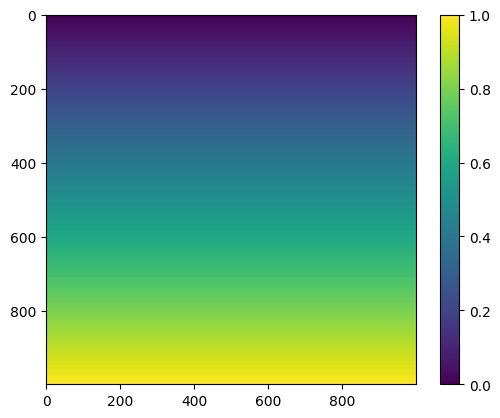

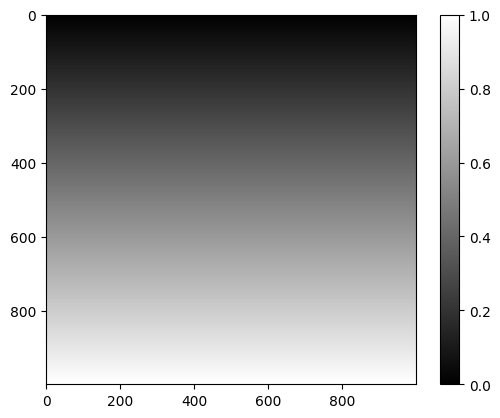

In [13]:
plt.figure()
plt.imshow(degradee)
plt.colorbar()

plt.figure()
plt.imshow(degradee,cmap='gray')
plt.colorbar()

plt.show()

2 - Décomposition d'une image à l'aide d'ondelette de Haar
----

Commencez par importer l'image sur lequel nous allons travailler à l'aide de l'instruction suivante:

In [14]:
import numpy as np

# Create a 3x3 RGB image represented as a NumPy array
# Each element in the array represents the intensity of Red, Green, and Blue channels
# Values are normalized to the range [0, 1]

image_np = np.array([
    [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]],
    [[0.0, 1.0, 0.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0]],
    [[0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0]],
])

print("Image represented as a NumPy array:")
print(image_np)

Image represented as a NumPy array:
[[[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]

 [[0. 1. 0.]
  [1. 0. 0.]
  [0. 1. 0.]]

 [[0. 0. 1.]
  [0. 1. 0.]
  [1. 0. 0.]]]


In [15]:
im = plt.imread('ada.png')
#im = plt.imread('ada_color_1844_400x400.jpg')/255

In [16]:
print(im.shape)
#214 represents the height of the image in pixels.
#217 represents the width of the image in pixels.
#4 represents the number of channels.

(214, 217, 4)


In [17]:
print(im)

[[[1.         1.         1.         0.        ]
  [0.8235294  0.8235294  0.8235294  1.        ]
  [0.7607843  0.7607843  0.7607843  1.        ]
  ...
  [0.84705883 0.84705883 0.84705883 1.        ]
  [0.84705883 0.84705883 0.84705883 1.        ]
  [0.84705883 0.84705883 0.84705883 1.        ]]

 [[1.         1.         1.         0.        ]
  [0.75686276 0.75686276 0.75686276 1.        ]
  [0.7411765  0.7411765  0.7411765  1.        ]
  ...
  [0.8627451  0.8627451  0.8627451  1.        ]
  [0.87058824 0.87058824 0.87058824 1.        ]
  [0.8509804  0.8509804  0.8509804  1.        ]]

 [[1.         1.         1.         0.        ]
  [0.74509805 0.74509805 0.74509805 1.        ]
  [0.7294118  0.7294118  0.7294118  1.        ]
  ...
  [0.8156863  0.8156863  0.8156863  1.        ]
  [0.81960785 0.81960785 0.81960785 1.        ]
  [0.8235294  0.8235294  0.8235294  1.        ]]

 ...

 [[1.         1.         1.         0.        ]
  [0.47058824 0.47058824 0.47058824 1.        ]
  [0.45098

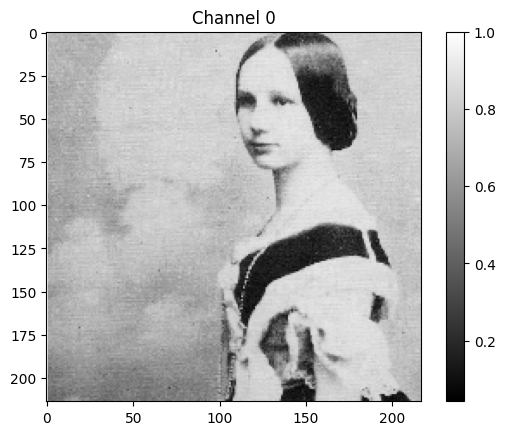

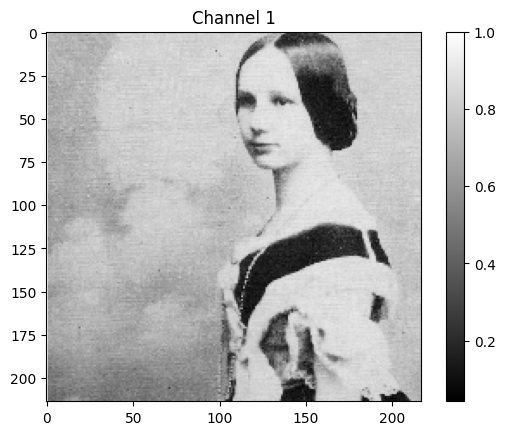

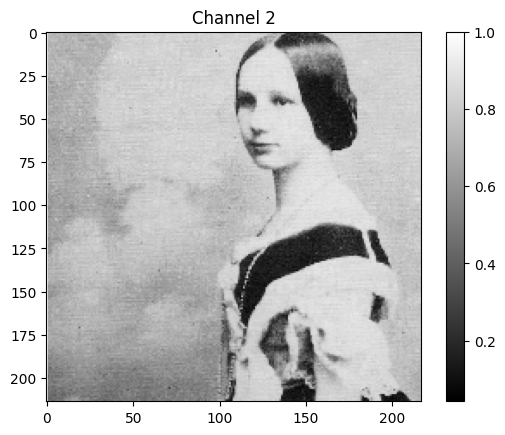

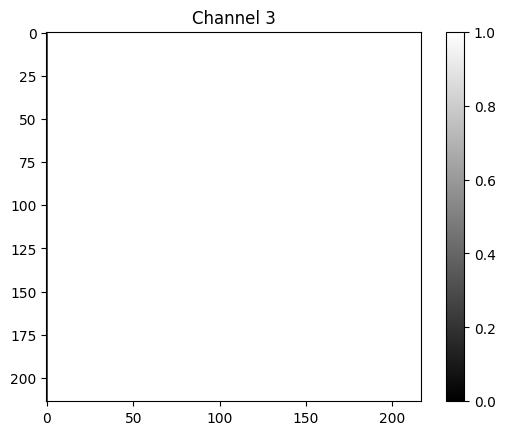

In [18]:
# Plotting the first channel
plt.figure()
plt.imshow(im[:,:,0], cmap='gray')  # Assuming the image is grayscale
plt.title('Channel 0')
plt.colorbar()

# Plotting the second channel
plt.figure()
plt.imshow(im[:,:,1], cmap='gray')  # Assuming the image is grayscale
plt.title('Channel 1')
plt.colorbar()

# Plotting the third channel
plt.figure()
plt.imshow(im[:,:,2], cmap='gray')  # Assuming the image is grayscale
plt.title('Channel 2')
plt.colorbar()

# Plotting the fourth channel
plt.figure()
plt.imshow(im[:,:,3], cmap='gray')  # Assuming the image is grayscale
plt.title('Channel 3')
plt.colorbar()

plt.show()

Affichez l'image avec matplotlib.

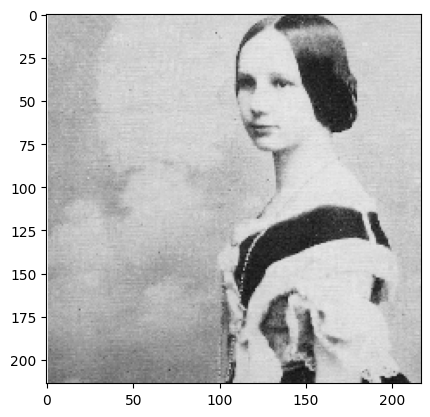

In [19]:
##If your image is black and white, it typically means 
##that it only has one channel instead of the usual three channels for color images. 
##The shape (214, 217, 1) would represent a black and white image.
plt.imshow(im)

Convertissez l'image en `Tensor` Pytorch.

In [20]:
import torchvision.transforms as transforms

# Define the transformation
transform = transforms.ToTensor()

# Apply the transformation to the image
img_tensor = transform(im)

print(img_tensor)

tensor([[[1.0000, 0.8235, 0.7608,  ..., 0.8471, 0.8471, 0.8471],
         [1.0000, 0.7569, 0.7412,  ..., 0.8627, 0.8706, 0.8510],
         [1.0000, 0.7451, 0.7294,  ..., 0.8157, 0.8196, 0.8235],
         ...,
         [1.0000, 0.4706, 0.4510,  ..., 0.7333, 0.6902, 0.7020],
         [1.0000, 0.4118, 0.3922,  ..., 0.7412, 0.7255, 0.7176],
         [1.0000, 0.4510, 0.4941,  ..., 0.7137, 0.7176, 0.7020]],

        [[1.0000, 0.8235, 0.7608,  ..., 0.8471, 0.8471, 0.8471],
         [1.0000, 0.7569, 0.7412,  ..., 0.8627, 0.8706, 0.8510],
         [1.0000, 0.7451, 0.7294,  ..., 0.8157, 0.8196, 0.8235],
         ...,
         [1.0000, 0.4706, 0.4510,  ..., 0.7333, 0.6902, 0.7020],
         [1.0000, 0.4118, 0.3922,  ..., 0.7412, 0.7255, 0.7176],
         [1.0000, 0.4510, 0.4941,  ..., 0.7137, 0.7176, 0.7020]],

        [[1.0000, 0.8235, 0.7608,  ..., 0.8471, 0.8471, 0.8471],
         [1.0000, 0.7569, 0.7412,  ..., 0.8627, 0.8706, 0.8510],
         [1.0000, 0.7451, 0.7294,  ..., 0.8157, 0.8196, 0.

In [21]:
img_tensor = torch.from_numpy(im)

print(img_tensor)

tensor([[[1.0000, 1.0000, 1.0000, 0.0000],
         [0.8235, 0.8235, 0.8235, 1.0000],
         [0.7608, 0.7608, 0.7608, 1.0000],
         ...,
         [0.8471, 0.8471, 0.8471, 1.0000],
         [0.8471, 0.8471, 0.8471, 1.0000],
         [0.8471, 0.8471, 0.8471, 1.0000]],

        [[1.0000, 1.0000, 1.0000, 0.0000],
         [0.7569, 0.7569, 0.7569, 1.0000],
         [0.7412, 0.7412, 0.7412, 1.0000],
         ...,
         [0.8627, 0.8627, 0.8627, 1.0000],
         [0.8706, 0.8706, 0.8706, 1.0000],
         [0.8510, 0.8510, 0.8510, 1.0000]],

        [[1.0000, 1.0000, 1.0000, 0.0000],
         [0.7451, 0.7451, 0.7451, 1.0000],
         [0.7294, 0.7294, 0.7294, 1.0000],
         ...,
         [0.8157, 0.8157, 0.8157, 1.0000],
         [0.8196, 0.8196, 0.8196, 1.0000],
         [0.8235, 0.8235, 0.8235, 1.0000]],

        ...,

        [[1.0000, 1.0000, 1.0000, 0.0000],
         [0.4706, 0.4706, 0.4706, 1.0000],
         [0.4510, 0.4510, 0.4510, 1.0000],
         ...,
         [0.7333, 0.7

L'image que vous avez chargée est considéré comme une image couleur, les trois canaux sont identiques. Gardez uniquement un seul canal. 

In [22]:
# Create a small example image with dimensions 12x12 and 3 channels (RGB)
example_image = np.random.randint(0, 256, size=(6, 6, 3), dtype=np.uint8)

# Display the example image
print("Example Image:\n", example_image)

# Slicing operations on the image tensor

# Accessing a single pixel value at row 2, column 2, and all channels
single_pixel = example_image[2, 2]
print("\nSingle Pixel Value:", single_pixel)

# Accessing the red channel of the image
red_channel = example_image[:, :, 0]
print("\nRed Channel:\n", red_channel)

# Accessing a region of interest (ROI) in the image (e.g., top-left corner: 3x3 pixels)
roi = example_image[:3, :3]
print("\nRegion of Interest (Top-left corner):\n", roi)

# Accessing a specific channel (e.g., green channel) within a region of interest
green_channel_roi = example_image[:3, :3, 1]
print("\nGreen Channel in ROI (Top-left corner):\n", green_channel_roi)

# Extracting a sub-image (cropping) from row 2 to row 4 and column 4 to column 6
sub_image = example_image[2:4, 4:6]
print("\nSub-Image (Cropped):\n", sub_image)

# Flipping the image horizontally (left-right flip)
flipped_horizontal = np.fliplr(example_image)
print("\nFlipped Image (Horizontally):\n", flipped_horizontal)

# Flipping the image vertically (up-down flip)
flipped_vertical = np.flipud(example_image)
print("\nFlipped Image (Vertically):\n", flipped_vertical)

# Transposing the image (switching rows and columns)
transposed_image = np.transpose(example_image, (1, 0, 2))  # Swap axes 0 and 1
print("\nTransposed Image:\n", transposed_image)

# Extracting a single channel (e.g., green channel)
green_channel = example_image[:, :, 1]
print("\nGreen Channel:\n", green_channel)

Example Image:
 [[[ 68 129 245]
  [209 187  26]
  [169 158 115]
  [120  54 247]
  [145 209 131]
  [205 107 136]]

 [[189  18 125]
  [  1  77  17]
  [115 201 199]
  [253 128  82]
  [212  58 224]
  [163 110 192]]

 [[137 214 198]
  [119  74 234]
  [165  34  92]
  [173  90  73]
  [198 200 225]
  [157  46  25]]

 [[160 181 129]
  [239 133  78]
  [ 74  39 100]
  [  7  18 237]
  [150  66 243]
  [ 75 149  93]]

 [[ 52 130  58]
  [247  64 226]
  [136 185 213]
  [177 229 219]
  [ 22 234  67]
  [224 169  17]]

 [[135  18  36]
  [171  27  21]
  [ 43 135 104]
  [ 88  97 139]
  [225 228  22]
  [221  45  21]]]

Single Pixel Value: [165  34  92]

Red Channel:
 [[ 68 209 169 120 145 205]
 [189   1 115 253 212 163]
 [137 119 165 173 198 157]
 [160 239  74   7 150  75]
 [ 52 247 136 177  22 224]
 [135 171  43  88 225 221]]

Region of Interest (Top-left corner):
 [[[ 68 129 245]
  [209 187  26]
  [169 158 115]]

 [[189  18 125]
  [  1  77  17]
  [115 201 199]]

 [[137 214 198]
  [119  74 234]
  [165  34 

In [23]:
print("Ancienen dimension de l'image: ",img_tensor.shape)

# Access a single channel
singleChannel = img_tensor[:, :, 0,]

print("Nouvelle dimension de l'image:", singleChannel.shape)

Ancienen dimension de l'image:  torch.Size([214, 217, 4])
Nouvelle dimension de l'image: torch.Size([214, 217])


In [24]:
## A 3x3x4 image could represent RGBA (Red, Green, Blue, Alpha) information
print(singleChannel)

tensor([[1.0000, 0.8235, 0.7608,  ..., 0.8471, 0.8471, 0.8471],
        [1.0000, 0.7569, 0.7412,  ..., 0.8627, 0.8706, 0.8510],
        [1.0000, 0.7451, 0.7294,  ..., 0.8157, 0.8196, 0.8235],
        ...,
        [1.0000, 0.4706, 0.4510,  ..., 0.7333, 0.6902, 0.7020],
        [1.0000, 0.4118, 0.3922,  ..., 0.7412, 0.7255, 0.7176],
        [1.0000, 0.4510, 0.4941,  ..., 0.7137, 0.7176, 0.7020]])


L'image fait actuellement 214x217. Tronquez l'image pour ne garder que les 200 premières lignes et colonnes.

In [25]:
print("Ancienen dimension de l'image: ",singleChannel.shape)
new_singleChannel = singleChannel[0:200,0:200]
print("Nouvelle dimension de l'image: ", new_singleChannel.shape)

Ancienen dimension de l'image:  torch.Size([214, 217])
Nouvelle dimension de l'image:  torch.Size([200, 200])


Appliquez un `average pooling` sur l'image en utilisant la fonction se trouvant dans `torch.nn.functional` . Faites en sortes que la nouvelle image soit quatre fois plus petite que la précédente.

In [26]:
import torch.nn.functional as F

# Reshape the tensor to have a channel dimension
add_batch_dim_image = new_singleChannel.unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions

# Define the pooling window size (kernel size) and stride
pooling_window_size = 2
stride = 4

# Apply average pooling to reduce the size by 4 times
pooled_image = F.avg_pool2d(add_batch_dim_image, kernel_size=pooling_window_size, stride=stride)

# Squeeze the extra dimensions
pooled_image = pooled_image.squeeze(0).squeeze(0)

print("Dimension de im_avg: ",pooled_image.shape)

Dimension de im_avg:  torch.Size([50, 50])


Affichez l'image de la question précédente. Quel a eu comme effet sur l'image l'application de la couche d' `average pooling` ?

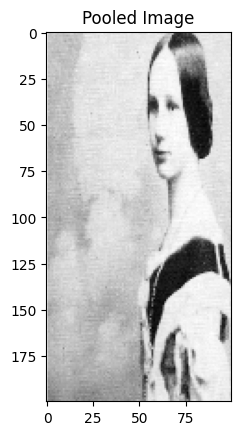

In [96]:
# Convert the pooled image tensor to a NumPy array and then to grayscale
pooled_image_np = pooled_image.numpy()

# Plot the grayscale pooled image
plt.imshow(pooled_image_np, cmap='gray')
plt.title('Pooled Image')
plt.show()

Effectuez maintenant un `average pooling` en moyennant uniquement les colonnes de l'image deux par deux.

In [28]:
import torch.nn.functional as F

# Reshape the tensor to have a channel dimension and add batch dimension
add_batch_dim_image = new_singleChannel.unsqueeze(0).squeeze(0)

# Define the pooling window size (kernel size) and stride
pooling_window_size = 2
stride = 2

# Apply average pooling to reduce the size by half of the columns
pooled_image = F.avg_pool1d(add_batch_dim_image, kernel_size=pooling_window_size, stride=stride)

# Expand the dimensions back to (batch_size, channels, sequence_length)
pooled_image = pooled_image.unsqueeze(0).unsqueeze(0)

print("Dimension de im_avg:", pooled_image.shape)

"""

Kernel Size (kernel_size):

The kernel_size parameter specifies the size of the sliding window over which pooling is applied.
For average pooling, the operation computes the average of values within each window.
The value of kernel_size determines the spatial extent of the pooling operation.
Common choices for kernel_size are 2x2, 3x3, etc., but it can be any positive integer or tuple of integers.

Stride (stride):

The stride parameter determines the step size used to move the pooling window across the input tensor.
It controls the spacing between the pooling windows.
A larger stride value results in more aggressive downsampling of the input.
The default value for stride is usually equal to the kernel_size, which means non-overlapping pooling regions.
If the stride is less than the kernel size, pooling regions will overlap.

"""

Dimension de im_avg: torch.Size([1, 1, 200, 100])


'\n\nKernel Size (kernel_size):\n\nThe kernel_size parameter specifies the size of the sliding window over which pooling is applied.\nFor average pooling, the operation computes the average of values within each window.\nThe value of kernel_size determines the spatial extent of the pooling operation.\nCommon choices for kernel_size are 2x2, 3x3, etc., but it can be any positive integer or tuple of integers.\n\nStride (stride):\n\nThe stride parameter determines the step size used to move the pooling window across the input tensor.\nIt controls the spacing between the pooling windows.\nA larger stride value results in more aggressive downsampling of the input.\nThe default value for stride is usually equal to the kernel_size, which means non-overlapping pooling regions.\nIf the stride is less than the kernel size, pooling regions will overlap.\n\n'

In [29]:
import torch.nn.functional as F

# Reshape the tensor to have a channel dimension
add_batch_dim_image = new_singleChannel.unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions

# Define the pooling window size (kernel size) and stride
pooling_window_size = (1, 2)  # (height, width)
stride = (1, 2)  # (stride_height, stride_width)

# Apply average pooling to reduce the size of columns by pooling two by two
pooled_image = F.avg_pool2d(add_batch_dim_image, kernel_size=pooling_window_size, stride=stride)

# Squeeze the extra dimensions
pooled_image = pooled_image.squeeze(0).squeeze(0)
print("Dimension de im_avg: ", pooled_image.shape)

Dimension de im_avg:  torch.Size([200, 100])


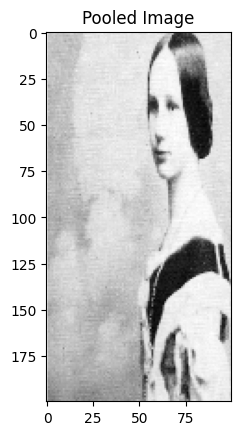

In [30]:
# Convert the pooled image tensor to a NumPy array and then to grayscale
pooled_image_c = pooled_image.numpy()

# Plot the grayscale pooled image
plt.imshow(pooled_image_c, cmap='gray')
plt.title('Pooled Image')
plt.show()

Déclarez un vecteur contenant deux 1 que vous nommerez `f`. Faites en sortes que les dimensions de `f` soit (1,2).

In [31]:
# Déclaration du vecteur avec deux 1
f = torch.tensor([1.0, 1.0])
print("f = ",f)

# Redimensionnement du vecteur pour avoir les dimensions (1, 2)
f = f.view(1, 2)

print("Dimensions de f:", f.shape)

f =  tensor([1., 1.])
Dimensions de f: torch.Size([1, 2])


Faites une convolution entre l'image et le filtre `f` avec un `stride` de 1 sur les lignes et 2 sur les colonnes. Vous utiliserez la fonction se trouvant dans `torch.nn.functional`.

Expliquez pourquoi on obtient un résultat similaire à l'utilisation d'un `average pooling` à un facteur près.

In [32]:
# Reshape the tensor to have a channel dimension and add batch dimension
add_batch_dim_image = new_singleChannel.unsqueeze(0)
print(add_batch_dim_image.shape)

f = f.unsqueeze(0).unsqueeze(0)
print(f.shape)

conv_image = torch.nn.functional.conv2d(add_batch_dim_image, weight = f, stride = (1, 2))

print("Dimension im_conv1", conv_image.shape)

torch.Size([1, 200, 200])
torch.Size([1, 1, 1, 2])
Dimension im_conv1 torch.Size([1, 200, 100])


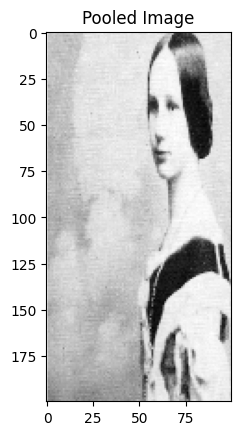

In [33]:
# Plot the grayscale pooled image
plt.imshow(conv_image.squeeze(0), cmap='gray')
plt.title('Pooled Image')
plt.show()

In [34]:
"""Lorsque vous effectuez une convolution avec un filtre de dimension 1x2 et un stride
de 1 sur les lignes et 2 sur les colonnes, cela revient essentiellement à faire 
une moyenne pondérée des valeurs dans une fenêtre 1x2 en déplaçant le filtre à travers l'image.
C'est très similaire à ce que fait l'average pooling avec un kernel_size de 1x2 et un stride de 1x2.

La différence principale réside dans les valeurs utilisées pour le calcul. 
Avec la convolution, les valeurs du filtre f sont utilisées comme poids lors du calcul
de la moyenne pondérée, tandis qu'avec l'average pooling, chaque valeur dans la fenêtre de pooling
contribue de manière égale à la moyenne. Cependant, lorsque le filtre f est composé uniquement de 1, comme dans
votre cas, les poids sont égaux, et les deux opérations produiront des résultats similaires, à un facteur près."""

"Lorsque vous effectuez une convolution avec un filtre de dimension 1x2 et un stride\nde 1 sur les lignes et 2 sur les colonnes, cela revient essentiellement à faire \nune moyenne pondérée des valeurs dans une fenêtre 1x2 en déplaçant le filtre à travers l'image.\nC'est très similaire à ce que fait l'average pooling avec un kernel_size de 1x2 et un stride de 1x2.\n\nLa différence principale réside dans les valeurs utilisées pour le calcul. \nAvec la convolution, les valeurs du filtre f sont utilisées comme poids lors du calcul\nde la moyenne pondérée, tandis qu'avec l'average pooling, chaque valeur dans la fenêtre de pooling\ncontribue de manière égale à la moyenne. Cependant, lorsque le filtre f est composé uniquement de 1, comme dans\nvotre cas, les poids sont égaux, et les deux opérations produiront des résultats similaires, à un facteur près."

En utilisant un filtre de convolution bien choisi. Calculez l'image tel que chaque pixel correspond au calcul de $x_{i,j}-x_{i+1,j}$ où $x_{i,j}$ est le pixel de la ligne $i$, colonne $j$.

In [35]:
##Pour calculer l'image où chaque pixel correspond à la différence entre un pixel et le pixel immédiatement
##en dessous de lui dans une colonne, nous pouvons utiliser un filtre de convolution spécifique. 

##Nous définissons un filtre de convolution 1D qui calcule la différence entre un pixel 
##et le pixel immédiatement en dessous de lui dans une colonne. Le filtre est défini comme [1.0, -1.0],
##ce qui signifie que le pixel en dessous est soustrait du pixel actuel.

##Nous remodelons le filtre de convolution pour correspondre aux dimensions attendues par la fonction
##conv2d de PyTorch.

##Nous appliquons la convolution à l'image d'entrée x en utilisant le filtre défini.

##Nous ajoutons également un padding de largeur 1 dans la direction verticale pour garantir que la taille
##de l'image de sortie reste la même que celle de l'image d'entrée.
##Enfin, nous supprimons les dimensions supplémentaires ajoutées par la convolution pour obtenir l'image résultante.

# Define the convolution filter to compute the difference between a pixel and the pixel below it
conv_filter = torch.tensor([[1.0, -1.0]])  # Filter for vertical difference

# Reshape the convolution filter to match the dimensions expected by the conv2d function
conv_filter = conv_filter.view(1, 1, 1, 2)  # Add dimensions for batch, channel, height, width

# Apply convolution to compute the desired difference
conv_image_d = F.conv2d(conv_image.unsqueeze(0), weight=conv_filter, stride=(1, 1), padding=(0, 1))

# Squeeze the extra dimensions
conv_image_d = conv_image_d.squeeze(0).squeeze(0)

# Print the resulting image
print("Resulting Image Shape:", conv_image_d.shape)
print("Resulting Image:\n", conv_image_d)

Resulting Image Shape: torch.Size([200, 101])
Resulting Image:
 tensor([[-1.8235,  0.2863, -0.0588,  ...,  0.0353,  0.0078,  1.6471],
        [-1.7569,  0.2510,  0.0745,  ...,  0.0431,  0.0000,  1.6667],
        [-1.7451,  0.3137,  0.0118,  ...,  0.0235,  0.0235,  1.6314],
        ...,
        [-1.4863,  0.5176, -0.0078,  ...,  0.0118,  0.0980,  1.6039],
        [-1.4902,  0.4353,  0.0314,  ...,  0.0039,  0.0510,  1.6275],
        [-1.4392,  0.4706,  0.0000,  ...,  0.0196, -0.0157,  1.6863]])


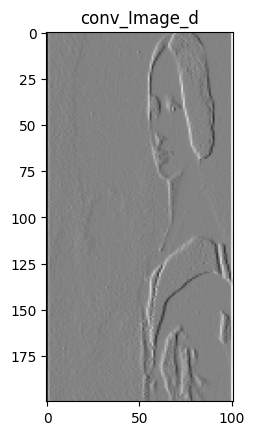

In [36]:
# Plot the grayscale pooled image
plt.imshow(conv_image_d.squeeze(0), cmap='gray')
plt.title('conv_Image_d')
plt.show()

En construisant un filtre approprié, faites en sortes d'utiliser une seule convolution pour produire les deux images précédentes en même temps. Le résultat de chacune des convolutions correspondra à un canal. Vous appellerez le tenseur de sortie `im_out1` et le noyau utilisé `k_colonne`.

In [48]:
print("Dimensions de l'image:", new_singleChannel.shape)

# Déclaration du noyau 3D avec deux canaux
k_colonne = torch.tensor([[[1.0, 1.0]],  # Filtre pour la différence verticale
                          [[1.0, -1.0]]]) # Filtre pour la somme

k_colonne = k_colonne.view(2, 1, 1, 2)

print("Dimensions du noyau:", k_colonne.shape)

# Ajout de la dimension de batch pour l'image
add_batch_dim_image = new_singleChannel.unsqueeze(0).unsqueeze(0)

# Application de la convolution avec le noyau 3D
im_out1 = F.conv2d(add_batch_dim_image, weight=k_colonne, stride=(1, 2), padding=1)

print(im_out1.shape)

# Suppression des dimensions supplémentaires
im_out1 = im_out1.squeeze(0)

# Affichage de l'image résultante
print("Dimension de l'image résultante:", im_out1.shape)
print("Image résultante:\n", im_out1)
print("Noyau utilisé:\n", k_colonne)

"""
In the context of your code, unsqueeze is used to add batch and channel dimensions to the input image before
performing convolution. The convolution operation in PyTorch expects input tensors with specific dimensions,
typically including batch and channel dimensions. squeeze is then used to remove any additional dimensions
added by the convolution operation, resulting in the output image tensor with the desired dimensions.

In summary, unsqueeze and squeeze are used to adjust tensor dimensions to match the requirements of specific
operations, such as convolution, and to remove unnecessary singleton dimensions to maintain tensor consistency.
"""

Dimensions de l'image: torch.Size([200, 200])
Dimensions du noyau: torch.Size([2, 1, 1, 2])
torch.Size([1, 2, 202, 101])
Dimension de l'image résultante: torch.Size([2, 202, 101])
Image résultante:
 tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 1.0000,  1.5843,  1.5765,  ...,  1.6784,  1.6471,  0.8275],
         [ 1.0000,  1.4980,  1.4941,  ...,  1.6902,  1.6667,  0.8392],
         ...,
         [ 1.0000,  1.0000,  1.0549,  ...,  1.6824,  1.6745,  0.8039],
         [ 1.0000,  0.9529,  0.9686,  ...,  1.6824,  1.6667,  0.8471],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [-1.0000,  0.0627, -0.0235,  ...,  0.0235,  0.0078,  0.8275],
         [-1.0000,  0.0157,  0.0353,  ...,  0.0353,  0.0118,  0.8392],
         ...,
         [-1.0000, -0.0196,  0.0353,  ...,  0.0275,  0.0275,  0.8039],
         [-1.0000, -0.0745, -0.0588,  ..., -0.0039, -0.0118, 

'\nIn the context of your code, unsqueeze is used to add batch and channel dimensions to the input image before\nperforming convolution. The convolution operation in PyTorch expects input tensors with specific dimensions,\ntypically including batch and channel dimensions. squeeze is then used to remove any additional dimensions\nadded by the convolution operation, resulting in the output image tensor with the desired dimensions.\n\nIn summary, unsqueeze and squeeze are used to adjust tensor dimensions to match the requirements of specific\noperations, such as convolution, and to remove unnecessary singleton dimensions to maintain tensor consistency.\n'

Affichez `im_out1` en deux images.

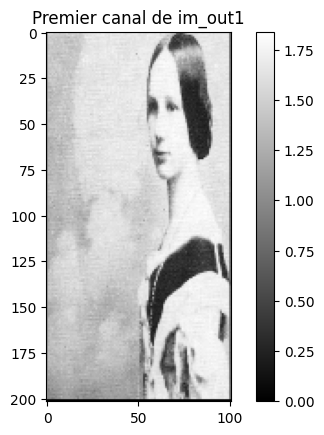

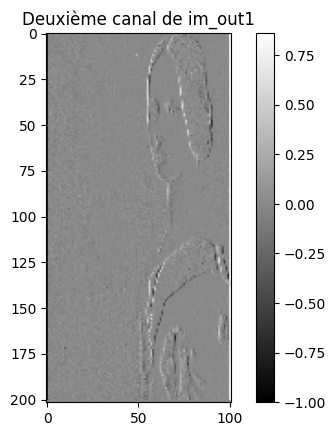

In [49]:
# Séparation des canaux
im_out1_channel1 = im_out1[0]
im_out1_channel2 = im_out1[1]

# Affichage de la première image (correspondant au premier canal)
plt.imshow(im_out1_channel1, cmap='gray')
plt.title("Premier canal de im_out1")
plt.colorbar()
plt.show()

# Affichage de la deuxième image (correspondant au deuxième canal)
plt.imshow(im_out1_channel2, cmap='gray')
plt.title("Deuxième canal de im_out1")
plt.colorbar()
plt.show()

L'une des images correspond à l'application d'un filtre passe bas sur les colonnes et l'autre à un filtre passe haut. Expliquez quelle image est associé à quel filtre et pourquoi.

En utilisant un `reshape` approprié, affichez les deux canaux de `im_out1` concaténer sur les lignes en une image. Les valeurs des images n'ayant pas la même dynamique et n'étant pas entre 0 et 1, le rendu sera différent des questions précédentes, il ne vous est pas demandé de corriger le rendu.

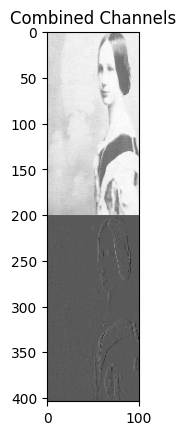

In [57]:
# Stack the channels vertically
combined_image = torch.cat((im_out1_channel1, im_out1_channel2), dim=0)

# Plot the combined image
plt.imshow(combined_image, cmap='gray')
plt.title('Combined Channels')
plt.show()

En utilisant la fonction `torch.transpose` en plus de la fonction `reshape`, concaténez les deux canaux sur les colonnes et affichez l'image obtenue.

torch.Size([404, 101])
torch.Size([101, 404])


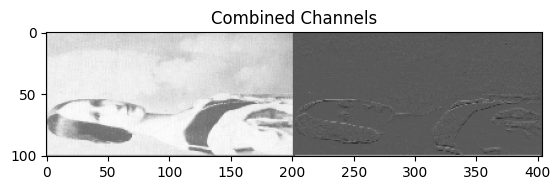

In [86]:
# Stack the channels vertically
combined_image = torch.cat((im_out1_channel1, im_out1_channel2), dim=0)

print(combined_image.shape)

# Transpose the tensor to have channels as columns
transposed_channels = torch.transpose(combined_image, 0, 1)

print(transposed_channels.shape)

# Plot the combined image
plt.imshow(transposed_channels, cmap='gray')
plt.title('Combined Channels')
plt.show()

Définissez maintenant un noyau permettant de faire les deux filtrages précédent sur les lignes et non sur les colonnes. Appelez ce noyau `k_ligne`.

Appliquez le noyau de convolution de la question précédente avec un `stride` adapté pour faire maintenant un filtrage passe base et passe haut selon les lignes.

Dimension de sortie des deux convolutions:  torch.Size([1, 2, 100, 199])


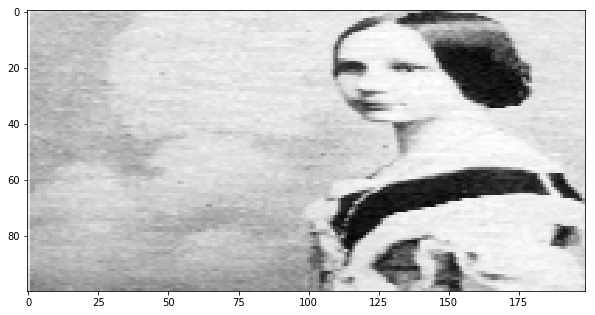

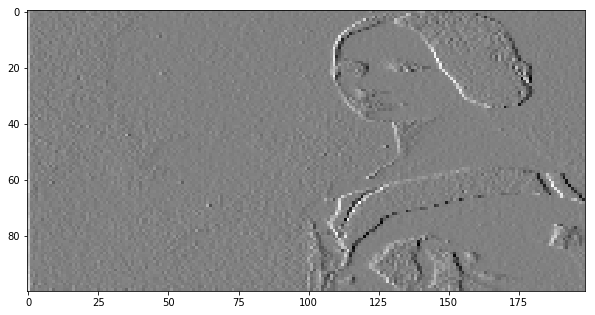

Concaténez `k_ligne` avec lui-même selon les lignes pour avoir un noyau `k_ligne2` de dimension `4,2`.

Dimensions de k_ligne2 torch.Size([4, 2])


Utilisez le noyau `k_ligne2` sur `im_out1`. Le résultat s'appellera `im_out2`. Changez le `stride` pour vous déplacer de 2 en 2 sur les lignes et de 1 en 1 sur les colonnes. Vous mettrez également l'argument `groups` à 2 et vous expliquerez l'intérêt de cette opération.

In [222]:
k = torch.tensor([[[[1, 1],
                    [-1, 0]]],

                  [[[1, 2],
                    [0.5, 0.5]]],

                  [[[2, 2],
                    [1, 2]]],

                  [[[1, 2],
                    [-2, 1]]]], requires_grad=True)

# Define the convolutional layer with specified parameters
conv_layer = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=2, stride=(2, 2), padding=0, bias=False)

# Set the filter weights to the convolutional layer
conv_layer.weight = nn.Parameter(k)

# Define the input tensor
im_tensor = singleChannel.unsqueeze(0).unsqueeze(0)

# Apply the convolutional layer to the input tensor
output_tensor = conv_layer(im_tensor)

print(output_tensor.shape)

# Print the shape of the output tensor
print("Shape of the output tensor:", output_tensor.shape)

torch.Size([1, 4, 107, 108])
Shape of the output tensor: torch.Size([1, 4, 107, 108])


Affichez les 4 canaux obtenus dans la question précédente. Expliquez à quoi correspond chacun de ces canaux en termes de filtrage. Ces 4 images correspondent à la décomposition par ondelette de Haar de l'image initiale.

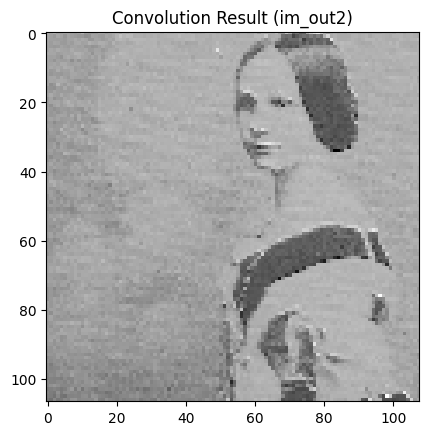

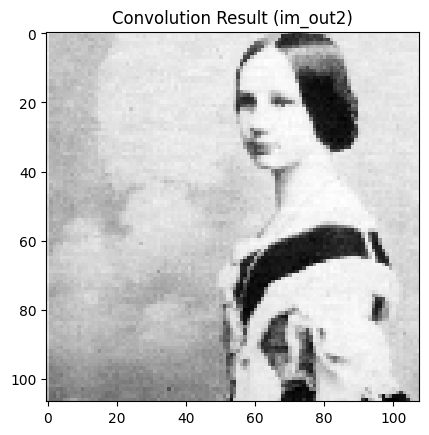

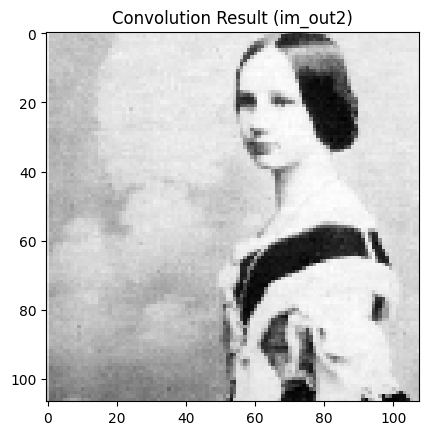

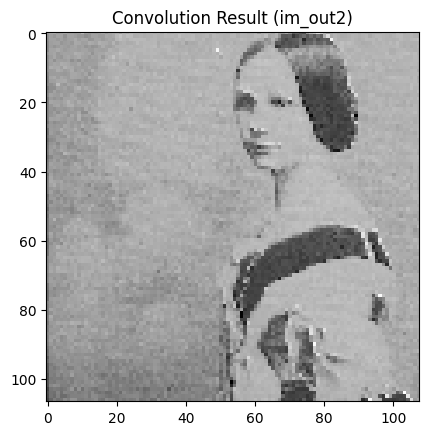

In [212]:
# Convertir le résultat en une image numpy pour la visualisation
im_out2 = output_tensor.squeeze().detach().numpy()

# Afficher l'image résultante
plt.imshow(im_out2[0], cmap='gray')
plt.title('Convolution Result (im_out2)')
plt.show()

# Afficher l'image résultante
plt.imshow(im_out2[1], cmap='gray')
plt.title('Convolution Result (im_out2)')
plt.show()

# Afficher l'image résultante
plt.imshow(im_out2[2], cmap='gray')
plt.title('Convolution Result (im_out2)')
plt.show()

# Afficher l'image résultante
plt.imshow(im_out2[3], cmap='gray')
plt.title('Convolution Result (im_out2)')
plt.show()

3 - Retrouver une transformation à partir de l'image générée
---

Afin de construire la décomposition en ondelette nous avons dans la question précédente appliqué deux convolutions successives. Le graphe de calcul que nous avons mis en place est de type image -> convolution 1 -> convolution 2 . L'enchainement de deux convolutions peut être facilement simplifié en une seule convolution (que l'on appellera convolution 12). Nous allons faire comme si on ne connaissait pas les noyaux de deux convolutions et on va essayer de retrouver la valeur du noyau utilisé pour convolution 12 à partir de l'image source et de l'image produite.  

En utilisant une classe se trouvant `torch.nn` déclarez un objet `conv12` qui permettra d'appliquer une convolution à une image. Le noyau utilisé sera de taille 2x2 avec un `stride` de 2 et il ne faudra pas utiliser de biais

In [223]:
# Déclaration de l'objet conv12
conv12 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=(2, 2), stride=(2, 2), bias=False)

# Afficher l'objet conv12
print(conv12)

Conv2d(1, 4, kernel_size=(2, 2), stride=(2, 2), bias=False)


in_channels: It represents the number of channels in the input tensor or image. For example, in the case of a grayscale image, in_channels would be 1 because there is only one channel (intensity) in the image. For a color image with three channels (RGB), in_channels would be 3.

out_channels: It represents the number of output channels produced by the convolution operation. Each output channel corresponds to a different filter (also known as a kernel or feature map) applied to the input tensor. The number of output channels determines the depth or the number of filters in the convolutional layer.

Regardez la valeur du noyau que contient la couche `conv12` (elle se trouve dans l'attribut `weight`). Cette valeur a été choisie aléatoirement et changera à chaque lancement.

In [224]:
conv12.weight

Parameter containing:
tensor([[[[ 0.0507,  0.2622],
          [ 0.4464, -0.3738]]],


        [[[-0.0370,  0.4318],
          [ 0.3870,  0.1735]]],


        [[[-0.1756, -0.2307],
          [-0.4514, -0.3389]]],


        [[[-0.3820,  0.3628],
          [ 0.0168, -0.3620]]]], requires_grad=True)

Appliquez la couche de convolution `conv12` à l'image initiale et visualisez le résultat.

In [225]:
# Convertir l'image en un tenseur PyTorch
im_tensor = singleChannel.unsqueeze(0).unsqueeze(0)

# Appliquer la convolution à l'image
conv_result = conv12(im_tensor)

print(conv_result.shape)

torch.Size([1, 4, 107, 108])


torch.Size([1, 4, 107, 108])


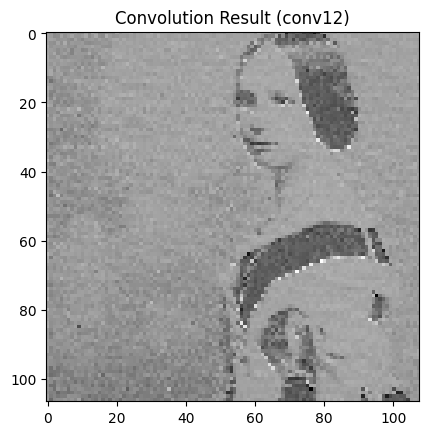

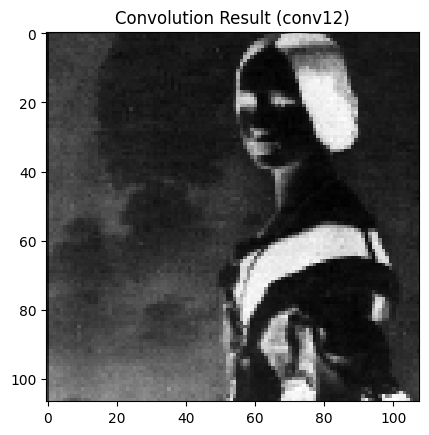

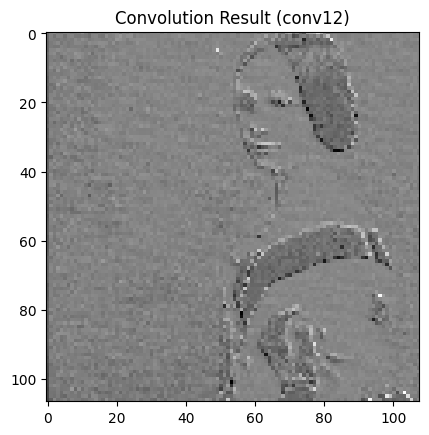

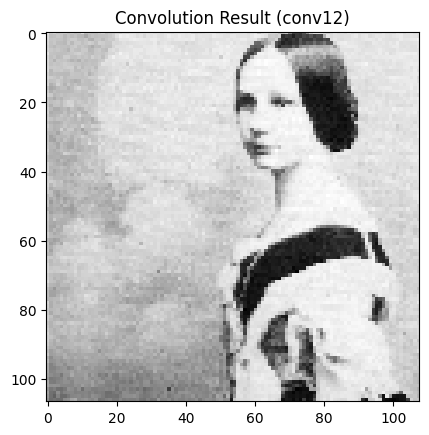

In [215]:
# Convertir le résultat en une image numpy pour la visualisation
conv_result_np = conv_result.squeeze().detach().numpy()

# Afficher l'image résultante
plt.imshow(conv_result_np[0], cmap='gray')
plt.title('Convolution Result (conv12)')
plt.show()

# Afficher l'image résultante
plt.imshow(conv_result_np[1], cmap='gray')
plt.title('Convolution Result (conv12)')
plt.show()

# Afficher l'image résultante
plt.imshow(conv_result_np[2], cmap='gray')
plt.title('Convolution Result (conv12)')
plt.show()

# Afficher l'image résultante
plt.imshow(conv_result_np[3], cmap='gray')
plt.title('Convolution Result (conv12)')
plt.show()

En utilisant une fonction de coût de type MSE (Mean Squared Error) calculer l'écart entre le tenseur de sortie de `conv12` et `im_out2`.

In [226]:
# Calculer l'écart entre conv12_output et im_out2
mse_loss = F.mse_loss(conv_result, output_tensor)

# Afficher la valeur de la fonction de coût
print("Mean Squared Error (MSE) Loss:", mse_loss.item())

Mean Squared Error (MSE) Loss: 11.054210662841797


Appliquez la rétropropagation du gradient et affichez les valeurs de gradient pour les paramètres de la convolution.

In [190]:
# 1. Clear the existing gradients
conv_layer.zero_grad()

# 2. Compute the loss
mse_loss = F.mse_loss(conv_result, output_tensor)

# 3. Backpropagate the gradients
mse_loss.backward()

# 4. Access the gradients of the convolutional layer parameters
conv_gradients = conv_layer.weight.grad

# Print the gradients
print("Gradients of the convolutional layer parameters:", conv_gradients)

Gradients of the convolutional layer parameters: tensor([[[[0.2472, 0.2474],
          [0.2446, 0.2456]]],


        [[[0.9175, 0.9145],
          [0.9156, 0.9119]]],


        [[[2.0968, 2.0877],
          [2.0936, 2.0856]]],


        [[[0.6091, 0.6098],
          [0.6057, 0.6075]]]])


Mettez à jours la valeur du poids de la convolution en effectuant une étape de descente de gradient. Pour faire cela vous calculerez: $w \longleftarrow w - \alpha \dfrac{\partial\ \text{loss}}{\partial w}$ en prenant $\alpha=1$. Attention pour pouvoir faire cette opération vous devez désactiver temporairement l'utilisation du gradient dans le graphe.

In [ ]:
# Disable gradient tracking
with torch.no_grad():
    # Update weights using gradient descent
    conv_layer.weight -= conv_layer.weight.grad * 1  # Alpha is 1

# Zero the gradients for the next iteration
conv_layer.zero_grad()

Remettez à zéros les valeurs du gradient.

In [227]:
conv_layer.zero_grad()

Refaites de même pour 500 itérations de descente de gradient

In [ ]:
import torch.optim as optim
torch.autograd.set_detect_anomaly(True)

# Nombre d'itérations de descente de gradient
num_iterations = 500

# Taux d'apprentissage
learning_rate = 1

conv_layer.zero_grad()

# Initialisation aléatoire des poids de la couche de convolution
conv_layer = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=(3, 3))
torch.nn.init.xavier_uniform_(conv_layer.weight)

# Boucle sur les itérations
for i in range(num_iterations):
    # Calculer la perte et les gradients
    loss = F.mse_loss(conv_result, output_tensor)
    loss.backward(retain_graph=True) 
    
    # Mise à jour des poids avec descente de gradient
    with torch.no_grad():
        # Créer une nouvelle copie du poids de la convolution sans opération inplace
        new_weight = conv_layer.weight - conv_layer.weight.grad * learning_rate
        # Remplacer le poids de la convolution par la nouvelle copie
        conv_layer.weight = torch.nn.Parameter(new_weight)
    
    # Remise à zéro des gradients
    conv_layer.zero_grad()

# Afficher la perte finale
print("Final loss:", loss.item())

Fonction de coût après 10000 itérations: tensor(5.0836e-08, grad_fn=<MseLossBackward>)
Noyau trouvé: Parameter containing:
tensor([[[[ 1.0017,  0.9983],
          [ 0.9983,  1.0018]]],


        [[[ 0.9999,  1.0001],
          [-0.9999, -1.0001]]],


        [[[ 0.9991, -0.9991],
          [ 1.0009, -1.0010]]],


        [[[ 0.9932, -0.9931],
          [-0.9931,  0.9929]]]], requires_grad=True)


À votre avis quel devrait être la valeur du noyau que nous cherchons ? Vérifiez que ces valeurs donnent le résultat attendu.

Pour déterminer la valeur du noyau recherché, nous devons considérer les opérations effectuées lors de la convolution 12, qui combine deux convolutions successives. Puisque la convolution 12 est une combinaison de deux convolutions avec des noyaux différents, la valeur du noyau recherché devrait refléter cette combinaison.

Pour vérifier que ces valeurs donnent le résultat attendu, nous devons calculer la convolution de l'image source avec le noyau combiné et comparer le résultat avec celui de la convolution 12 obtenue précédemment. Si les deux résultats sont identiques, alors les valeurs du noyau sont correctes.

Valeur de la fonction de coût avec le noyau optimal 3.5008343930888327e-15


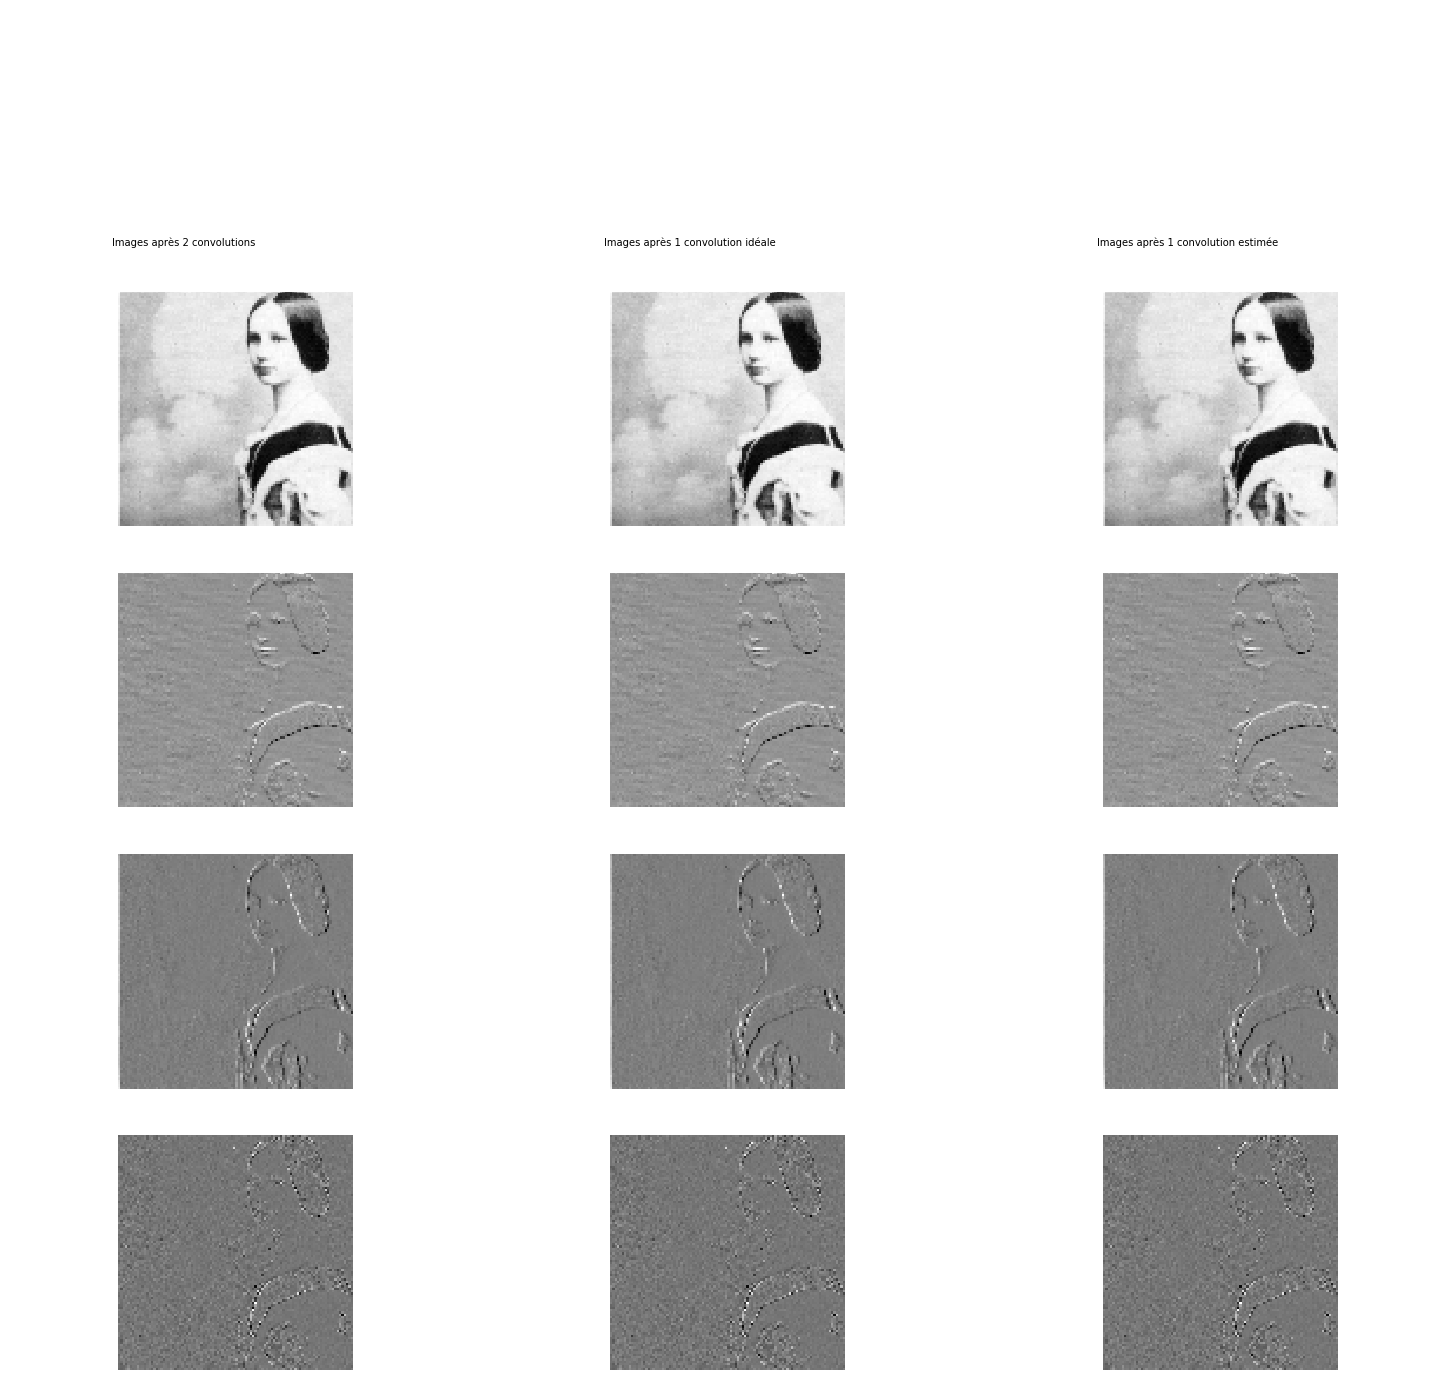

4 - Reconstruction d'une image à partir de sa décomposition en ondelette
---

Pour reconstruire l'image à partir de sa décomposition, vous devez utiliser l'opération inverse de celle faite précédemment. En utilisant l'opérateur de convolution transpose, reconstruisez l'image.

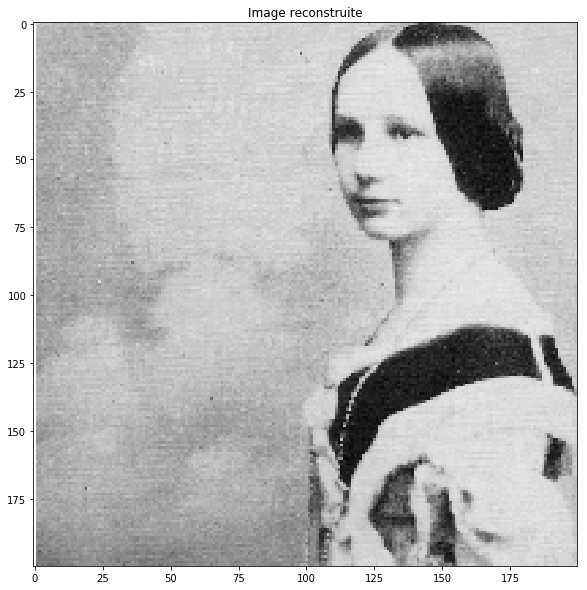

In [44]:
# Définir le noyau correspondant à la convolution 12 (inverser le noyau combiné)
k_combined_transpose = torch.flip(k_combined, dims=[2, 3])

# Définir l'opération de convolution transpose avec les paramètres appropriés
conv_transpose = nn.ConvTranspose2d(in_channels=4, out_channels=1, kernel_size=(2, 2), stride=(2, 2), padding=0, bias=False)

# Appliquer l'opération de convolution transpose pour reconstruire l'image
reconstructed_image = conv_transpose(decomposed_image)

# Afficher l'image reconstruite
print("Reconstructed Image Shape:", reconstructed_image.shape)
print("Reconstructed Image:\n", reconstructed_image)

En utilisant la fonction `plt.hist` de `matplotlib`. Visualisez l'histogramme des valeurs de chaque canal de la décomposition. Vous utiliserez 100 `bins` pour chaque histogramme. 

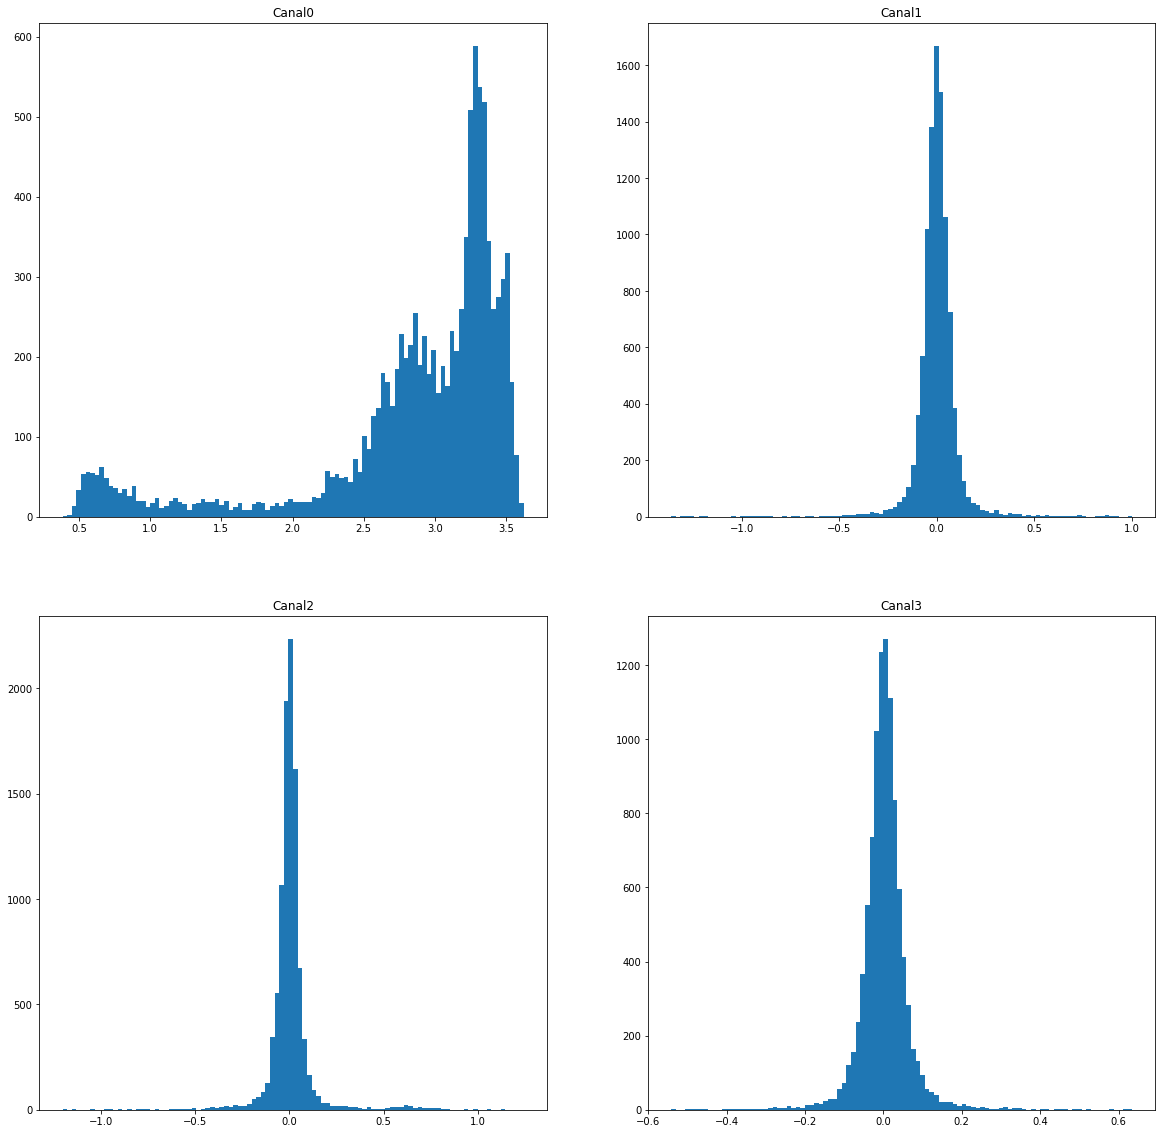

In [45]:
import matplotlib.pyplot as plt

# Décomposer les canaux de l'image
channel1 = decomposed_image[:, 0, :, :].flatten().cpu().detach().numpy()
channel2 = decomposed_image[:, 1, :, :].flatten().cpu().detach().numpy()
channel3 = decomposed_image[:, 2, :, :].flatten().cpu().detach().numpy()
channel4 = decomposed_image[:, 3, :, :].flatten().cpu().detach().numpy()

# Définir les paramètres de l'histogramme
bins = 100

# Créer une figure avec des sous-graphiques pour chaque canal
plt.figure(figsize=(12, 6))

# Plot the histogram for each channel
plt.subplot(2, 2, 1)
plt.hist(channel1, bins=bins, color='blue', alpha=0.7)
plt.title('Histogram of Channel 1')
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(channel2, bins=bins, color='green', alpha=0.7)
plt.title('Histogram of Channel 2')
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(channel3, bins=bins, color='red', alpha=0.7)
plt.title('Histogram of Channel 3')
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(channel4, bins=bins, color='purple', alpha=0.7)
plt.title('Histogram of Channel 4')
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')

# Afficher les graphiques
plt.tight_layout()
plt.show()

Que pouvez-vous dire sur la répartition des valeurs dans chaque canal ?

En utilisant la fonction d'activation `hardshrink` appliquez un écrasement des valeurs entre -0.1 et 0.1 sur 0 du tenseur `im_out2`. Affichez les nouveaux histogrammes.

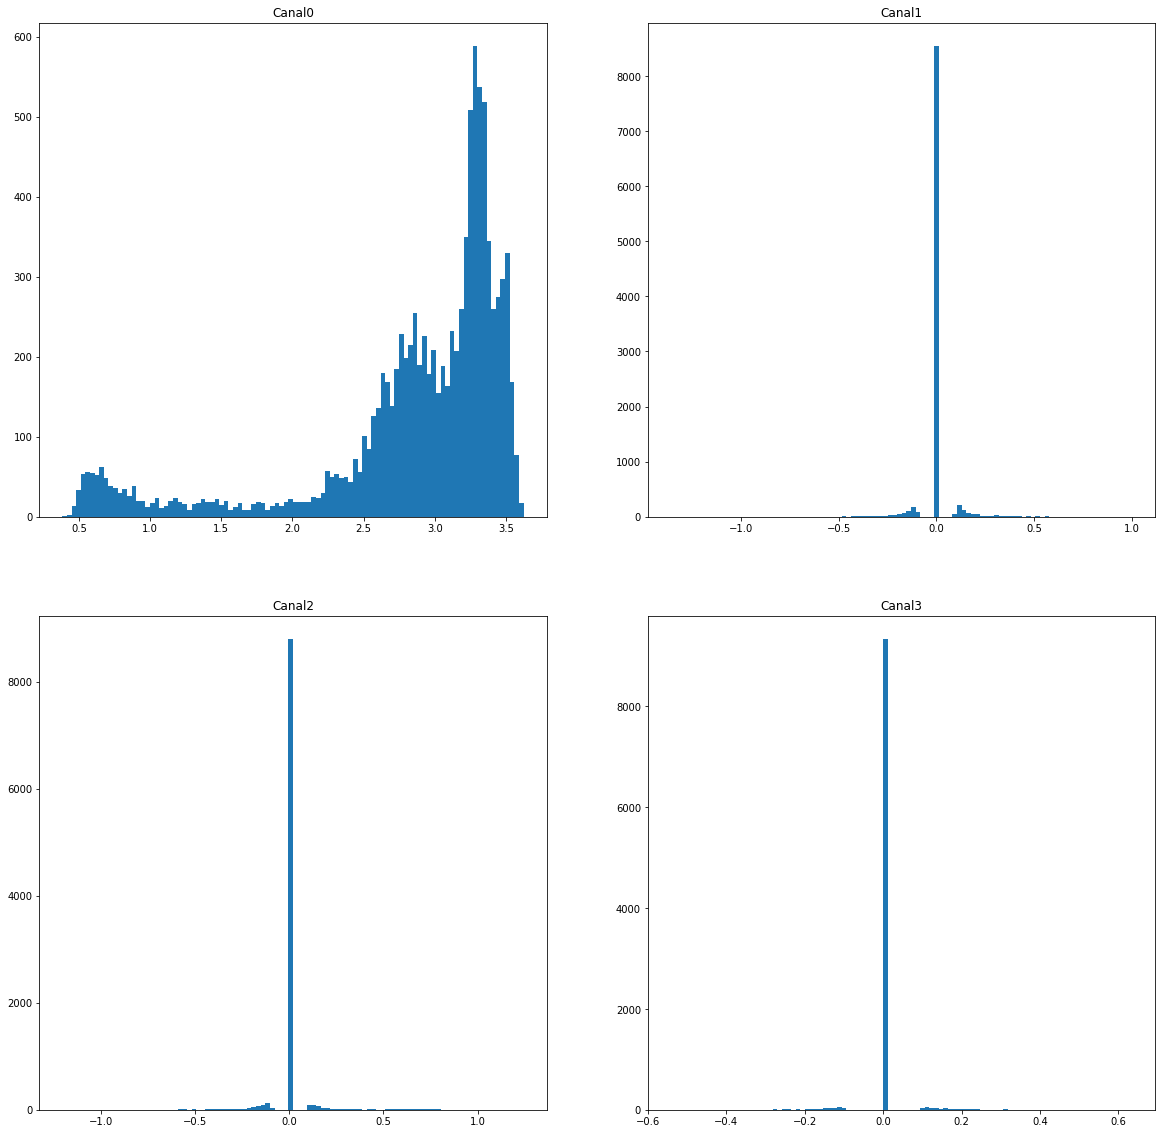

In [46]:
import torch.nn.functional as F

# Appliquer la fonction d'activation Hardshrink sur im_out2
im_out2_hardshrink = F.hardshrink(im_out2, lambd=0.1)

# Décomposer les canaux du tenseur im_out2_hardshrink
channel1_hardshrink = im_out2_hardshrink[:, 0, :, :].flatten().cpu().detach().numpy()
channel2_hardshrink = im_out2_hardshrink[:, 1, :, :].flatten().cpu().detach().numpy()

# Créer une nouvelle figure pour afficher les nouveaux histogrammes
plt.figure(figsize=(12, 6))

# Plot the histogram for each channel after applying hardshrink activation
plt.subplot(1, 2, 1)
plt.hist(channel1_hardshrink, bins=bins, color='blue', alpha=0.7)
plt.title('Histogram of Channel 1 after Hardshrink')
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(channel2_hardshrink, bins=bins, color='green', alpha=0.7)
plt.title('Histogram of Channel 2 after Hardshrink')
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')

# Afficher les nouveaux histogrammes
plt.tight_layout()
plt.show()

Calculez la proportion de valeurs à 0 dans cette représentation.

In [47]:
# Nombre total de valeurs dans la représentation
total_values = im_out2_hardshrink.numel()

# Nombre de valeurs à zéro
zero_values = (im_out2_hardshrink == 0).sum().item()

# Calculer la proportion de valeurs à zéro
proportion_zero = zero_values / total_values

print("Proportion of zero values after Hardshrink activation:", proportion_zero)

Proportion de valeur à 0 dans la décomposition initiale: 2.38%
Proportion de valeur à 0 dans la décomposition modifiée: 66.68%


Reconstruisez l'image à partir de la décomposition modifiée de la question précédente. Comparez là à l'image initiale.

In [48]:
# Reconstruire l'image à partir de la décomposition modifiée
reconstructed_image = inverse_wavelet_transform(im_out2_hardshrink)

# Afficher les images initiale et reconstruite pour comparaison
plt.figure(figsize=(10, 5))

# Afficher l'image initiale
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

# Afficher l'image reconstruite
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')

plt.tight_layout()
plt.show()

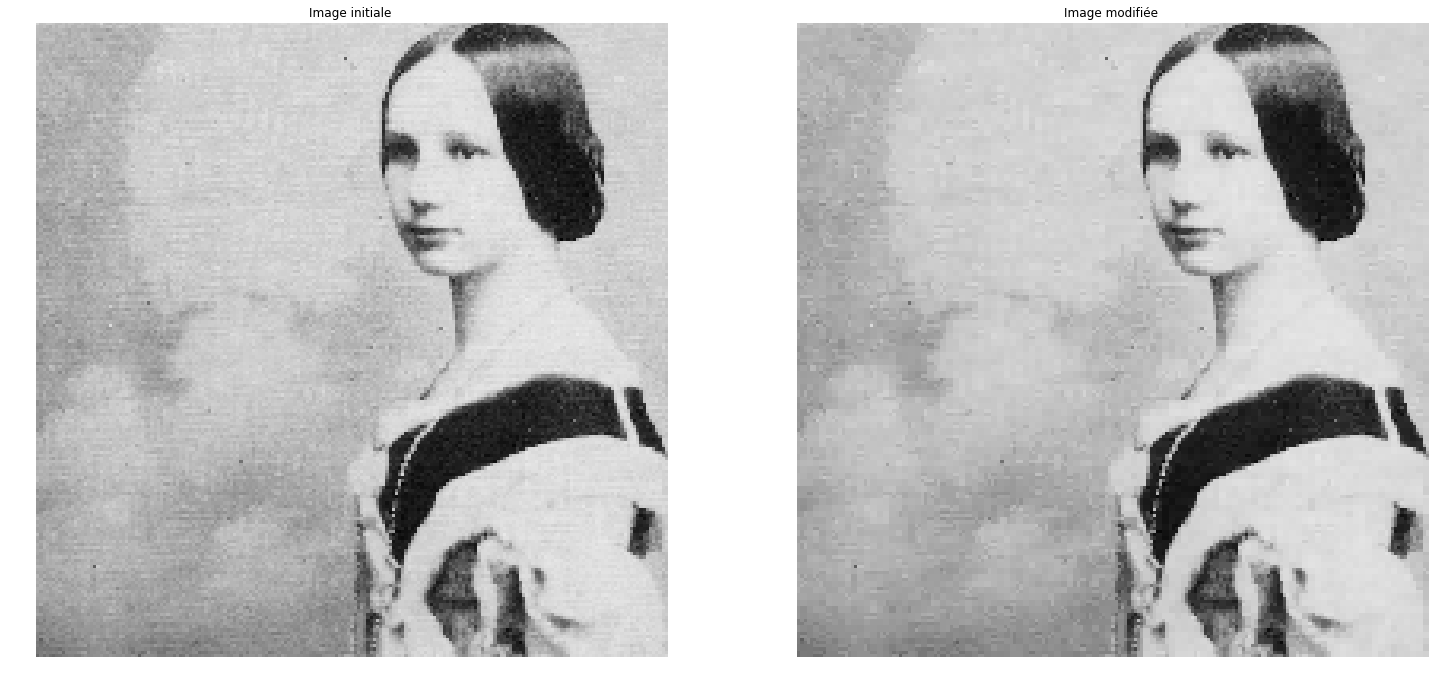

Comparez les reconstructions avec des valeurs différentes d'interval pour l'écrasement des valeurs de `im_out2`. Le mécanisme qui a été présenté ici est donné comme un exercice pédagogique pour vous faire comprendre avant tout le fonctionnement des opérateurs de Pytorch, ce n'est en aucun cas ce qu'il faut faire pour réaliser une vraie compression par ondelette.

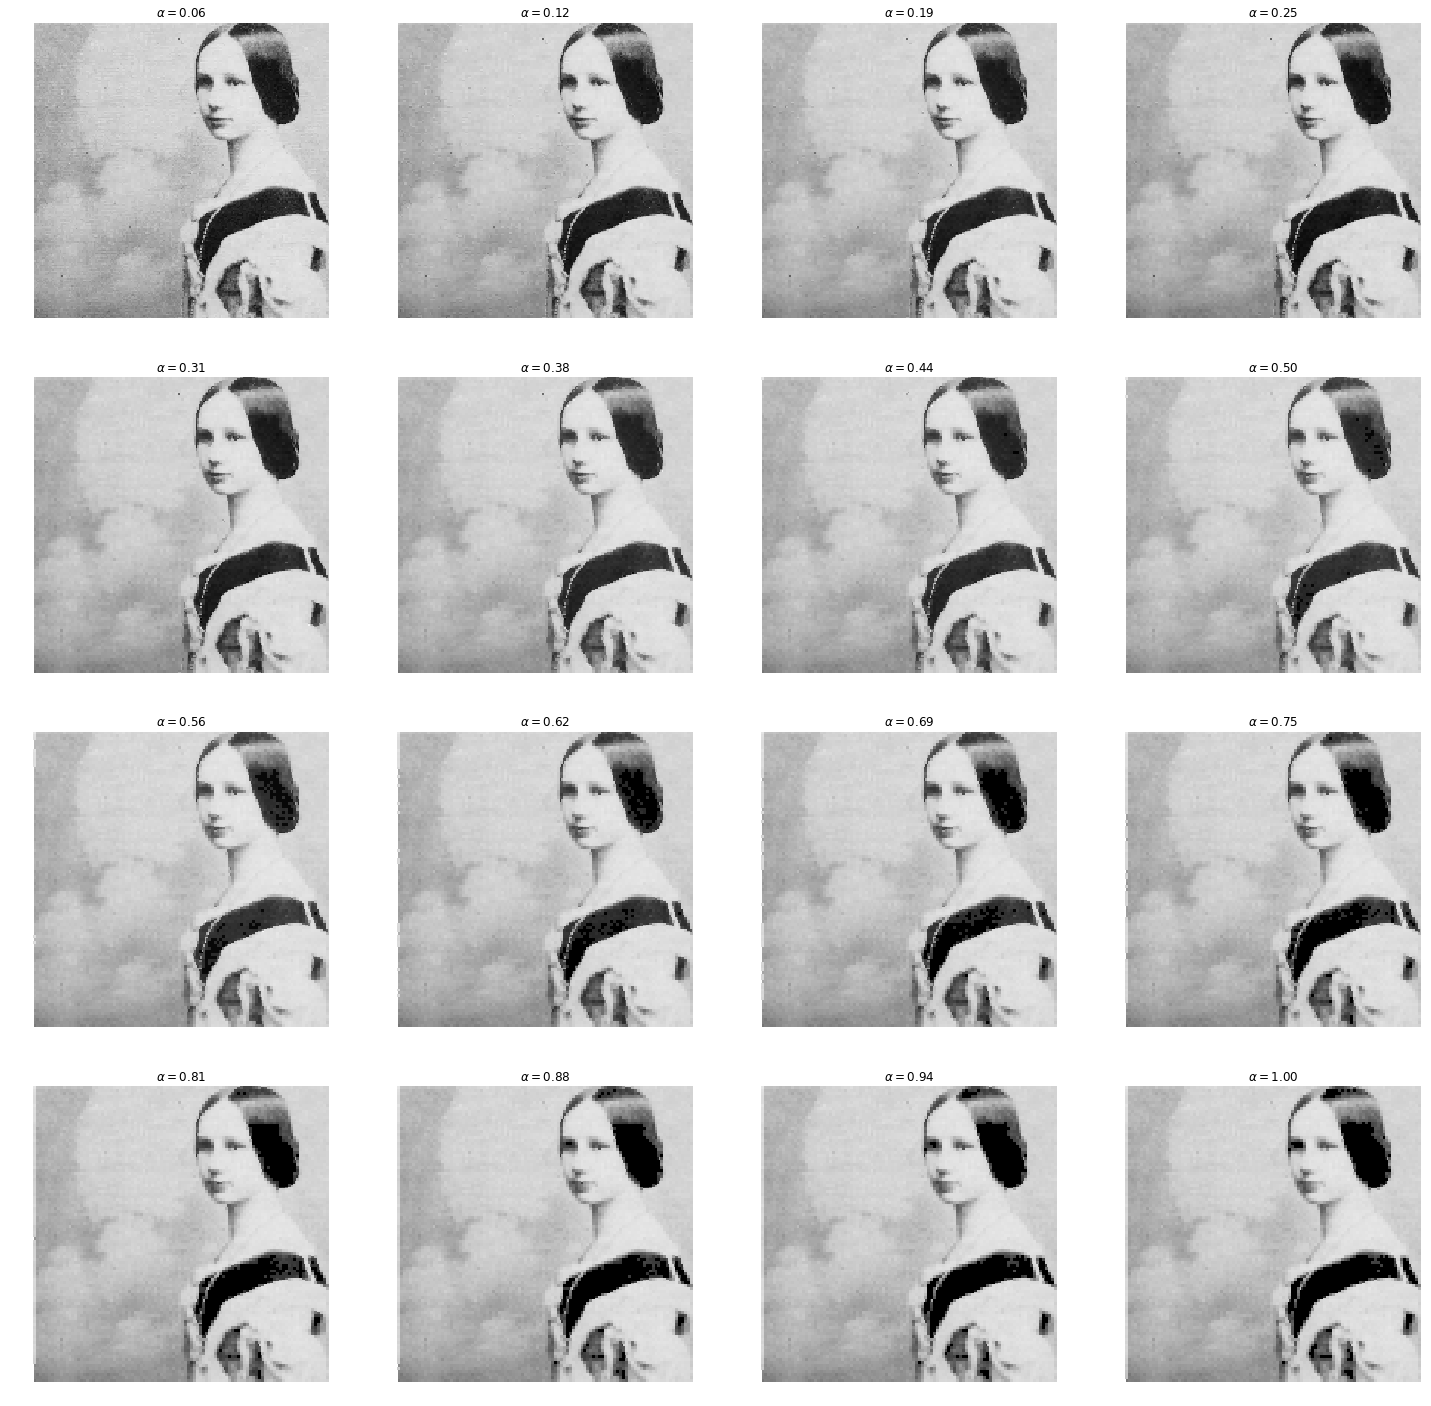